In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

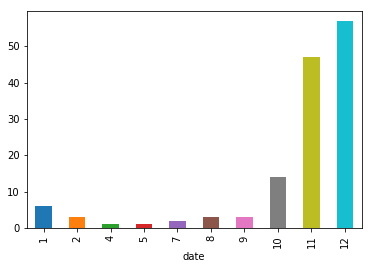

In [30]:
usa_christmas = release_dates[(release_dates['title'].str.contains('Christmas')) & (release_dates['country'] == 'USA')]
usa_christmas.groupby(usa_christmas['date'].dt.month).size().plot(kind = 'bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

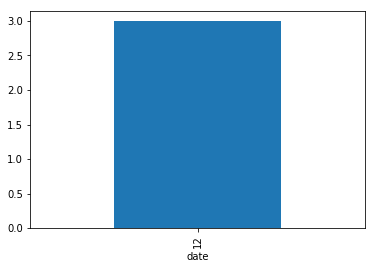

In [32]:
usa_hobbit = release_dates[(release_dates['title'].str.contains('The Hobbit')) & (release_dates['country'] == 'USA')]
usa_hobbit.groupby(usa_hobbit['date'].dt.month).size().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

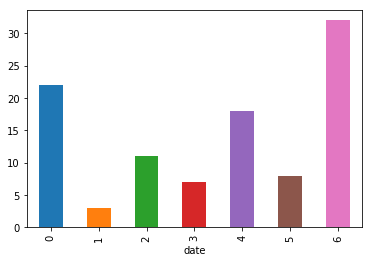

In [35]:
usa_romance = release_dates[(release_dates['title'].str.contains('Romance')) & (release_dates['country'] == 'USA')]
usa_romance.groupby(usa_romance['date'].dt.dayofweek).size().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

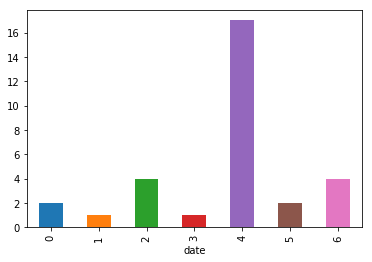

In [37]:
usa_action = release_dates[(release_dates['title'].str.contains('Action')) & (release_dates['country'] == 'USA')]
usa_action.groupby(usa_action['date'].dt.dayofweek).size().plot(kind = 'bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [47]:
judi_dench = cast[(cast['name'] == 'Judi Dench') & (cast['year'] //10 * 10 == 1990)]
judi_dench.merge(release_dates[release_dates['country'] == 'USA'])['date']

0   1995-11-17
1   1996-12-25
2   1996-03-22
3   1997-10-03
4   1999-01-08
5   1999-05-14
6   1999-11-19
7   1997-12-19
Name: date, dtype: datetime64[ns]

### In which months do films with Judi Dench tend to be released in the USA?

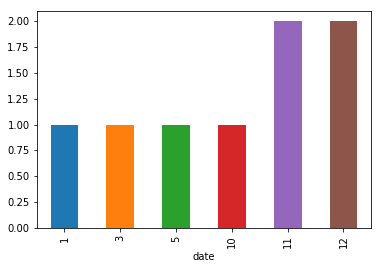

In [60]:
jd = judi_dench.merge(release_dates[release_dates['country'] == 'USA'])
jd.groupby(jd['date'].dt.month).size().plot(kind = 'bar')

### In which months do films with Tom Cruise tend to be released in the USA?

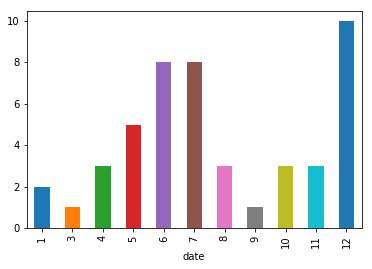

In [59]:
tc = cast[cast['name'] == 'Tom Cruise'].merge(release_dates[release_dates['country'] == 'USA'])
tc.groupby(tc['date'].dt.month).size().plot(kind = 'bar')